In [92]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')
import cat_utils

In [94]:
# catalogs to coherence (ie, normalized cross spectrum)
def imgs_to_cspec(img1,img2,dtheta_deg,nbins,lmin,lmax,label,hann=True,ylim=[-.2,.2],xlim=[1,300]):
    lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(img1,img2,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=hann,uselogbins=True)
    lbins,pspec1_f,pspec2_f,xspec_f,bin_counts = cat_utils.calc_xspec(img1,np.rot90(img2),dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=hann,uselogbins=True)

    c = xspec/np.sqrt(pspec1*pspec2)
    dc = np.sqrt(.5*(1+c**2)/(1.*bin_counts/4))

    c_f = xspec_f/np.sqrt(pspec1_f*pspec2_f)
    dc_f = np.sqrt(.5*(1+c_f**2)/(1.*bin_counts/4))

    plt.figure(figsize=(34,4))
    plt.subplot(161)
    plt.imshow(img1)
    plt.colorbar()
    
    plt.subplot(162)
    plt.imshow(img2)
    plt.colorbar()

    plt.subplot(163)
    thetabins = 180.*60/lbins
    plt.loglog(thetabins,pspec1,'b.-')
    plt.loglog(thetabins*1.1,pspec1_f,'r.-')
    plt.xlim(xlim)
    plt.xlabel('180*60/ell (amin)')
    plt.title('pspec1')
    
    plt.subplot(164)
    thetabins = 180.*60/lbins
    plt.loglog(thetabins,pspec2,'b.-')
    plt.loglog(thetabins*1.1,pspec2,'r.-')
    plt.xlim(xlim)
    plt.xlabel('180*60/ell (amin)')
    plt.title('pspec2')
    
    plt.subplot(165)
    thetabins = 180.*60/lbins
    plt.loglog(thetabins,xspec,'b.-')
    plt.loglog(thetabins*1.1,xspec_f,'r.-')
    plt.semilogx([.1,1000],[0,0],'k-')
    plt.xlim(xlim)
    plt.xlabel('180*60/ell (amin)')
    plt.title('xspec')
    
    plt.subplot(166)
    thetabins = 180.*60/lbins
    plt.errorbar(thetabins,c,yerr=dc,fmt='b.-')
    plt.errorbar(thetabins*1.1,c_f,yerr=dc_f,fmt='r.-')
    plt.semilogx([.1,1000],[0,0],'k-')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('180*60/ell (amin)')
    plt.title(label)
    print(c)
    print(bin_counts)
nbins=10
lmin,lmax = 10,7500

In [95]:
# simulate a poisson source distribution in 3D space with gaussian fluxes, plot the 3D power spectrum,
# then project to observe coordinates and plot the 2D distribution

In [114]:
zmin,zmax = 10,300 # Mpc
xmin,xmax = -50,50
ngal = 500000*4
galx = xmin+(xmax-xmin)*np.random.rand(ngal)
galy = xmin+(xmax-xmin)*np.random.rand(ngal)
galz = zmin+(zmax-zmin)*np.random.rand(ngal)
galL = 1000+300*np.random.randn(ngal)

In [115]:
thx = galx/galz*60 # deg
thy = galy/galz*60 # deg
dist = np.sqrt(galx**2+galy**2+galz**2)
galflux = galL/dist**2

In [116]:
# fov_deg = 20.
infov = (-fov_deg/2<thx)&(thx<fov_deg/2)&(-fov_deg/2<thy)&(thy<fov_deg/2)
# plt.scatter(thx[infov],thy[infov],15,galflux[infov],edgecolor='none',vmin=0,vmax=.1)
# plt.colorbar()

In [117]:
np.sum(infov)

688815

In [118]:
g = infov&(galflux<np.percentile(galflux,90))
cat = cat_utils.Catalog(thx[g],thy[g],galflux[g])
dtheta_deg = 2./60
img,img_counts = cat_utils.cat2img(cat,cat,dtheta_deg=dtheta_deg,verbose=True)

0.0
0.00333889816361
0.00667779632721
0.0100166944908
0.0133555926544
0.016694490818
0.0200333889816
0.0233722871452
0.0267111853088
0.0300500834725
0.0333889816361
0.0367278797997
0.0400667779633
0.0434056761269
0.0467445742905
0.0500834724541
0.0534223706177
0.0567612687813
0.0601001669449
0.0634390651085
0.0667779632721
0.0701168614357
0.0734557595993
0.0767946577629
0.0801335559265
0.0834724540902
0.0868113522538
0.0901502504174
0.093489148581
0.0968280467446
0.100166944908
0.103505843072
0.106844741235
0.110183639399
0.113522537563
0.116861435726
0.12020033389
0.123539232053
0.126878130217
0.130217028381
0.133555926544
0.136894824708
0.140233722871
0.143572621035
0.146911519199
0.150250417362
0.153589315526
0.156928213689
0.160267111853
0.163606010017
0.16694490818
0.170283806344
0.173622704508
0.176961602671
0.180300500835
0.183639398998
0.186978297162
0.190317195326
0.193656093489
0.196994991653
0.200333889816
0.20367278798
0.207011686144
0.210350584307
0.213689482471
0.21702838

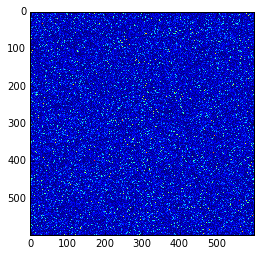

In [119]:
plt.imshow(img,interpolation='nearest')

maximum ell is 7624
maximum ell is 7624
[ nan   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.]
[  0.00000000e+00   4.00000000e+00   4.00000000e+00   4.00000000e+00
   1.20000000e+01   2.40000000e+01   4.80000000e+01   9.60000000e+01
   1.80000000e+02   3.52000000e+02   6.80000000e+02   1.32800000e+03
   2.52800000e+03   4.98400000e+03   9.61600000e+03   1.86280000e+04
   3.61120000e+04   7.00440000e+04   1.35752000e+05   7.81840000e+04]


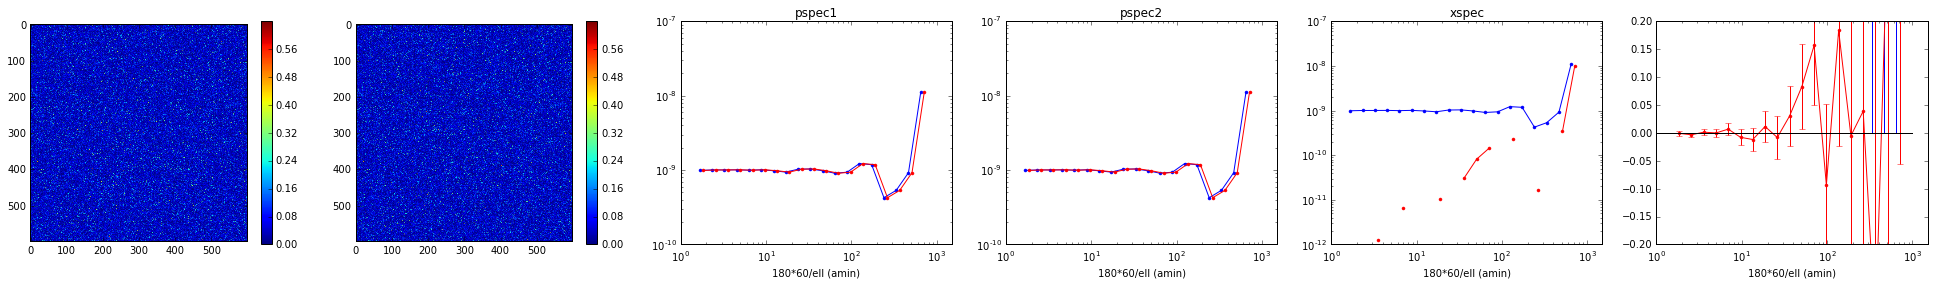

In [122]:
imgs_to_cspec(img,img,dtheta_deg,nbins=20,lmin=10,lmax=7500,label='',xlim=[1,1500],hann=False)

In [85]:
np.sum(g)

40140